<a href="https://colab.research.google.com/github/iura77/Perm-TBO/blob/main/Perm_TBO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
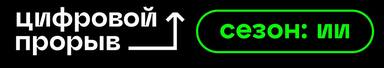
</center>

<center>
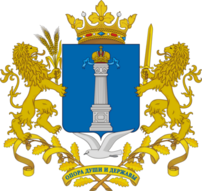
<h1><strong>Разработка системы видео-аналитики подсчета ТБО</strong></h1>
</center>

Предварительным условием успешной работы ноутбука является загрузка в папку с ноутбуком набора изображений в папку "video" согласно ранее представленному формату c подпапками frames_rgb и frames_ms 


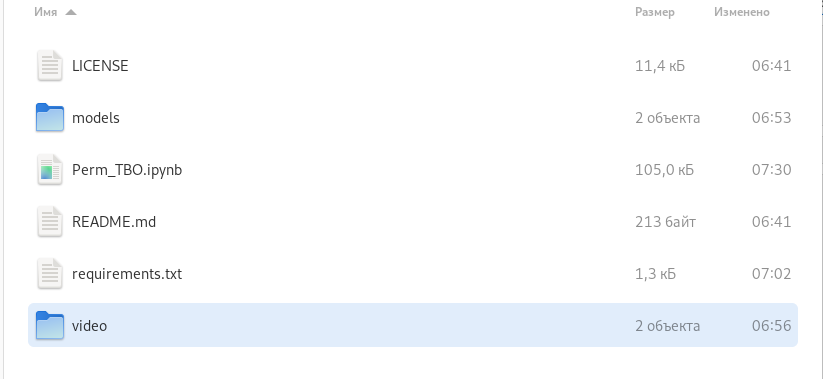


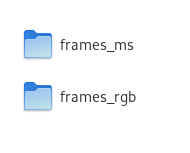

Для запуска кода нам необходимо установить библиотеку ultralytics и необходимые ей библиотеки

In [ ]:
# Устанавливаем нужные библиотеки
!pip install -r ./requirements.txt

# Устанавливаем библиотеку ultralytics с необхоимой нам yolo v8
!pip install ultralytics

Очищаем папки от предыдущих прогонов

In [37]:
import os
import shutil

# Удаляем папку с результатами предыдущего обнаружения
dirpath = r'./runs/'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)

# Удаляем папку с результатами подсчёта
dirpath = r'./result/'
if os.path.exists(dirpath) and os.path.isdir(dirpath):
    shutil.rmtree(dirpath)


Загружаем обученные модели

In [ ]:
from ultralytics import YOLO

# Загружаем модель для обнаружения объектов в RGB спектре
model_rgb = YOLO(r"./models/best_rgb.pt")


Обнаружение объектов

In [ ]:
# Обнаружение на RGB
results_rgb = model_rgb.track(source="./video/frames_rgb/", save_txt=True, save_conf=True)


Подсчёт обнаружений объектов

In [ ]:
import os
import csv

if not os.path.isdir(r'./result/'):
    os.makedirs(r'./result/')

# Папка с файлами txt
txt_dir = r'./runs/detect/predict/labels/'

# Создаем список для хранения данных по каждому кадру
frames_data = []

# Сначала обходим файлы, считывая данные по каждому кадру
for filename in os.listdir(txt_dir):
    if filename.endswith(".txt"):
        frame_id = os.path.splitext(filename)[0]  # Получаем имя файла без расширения
        frame_number = ''.join(filter(str.isdigit, frame_id))  # Извлекаем числовую часть имени файла
        frame_id = "f" + str(int(frame_number))  # Создаем идентификатор кадра в нужном формате
        frame_data = [frame_id]
        with open(os.path.join(txt_dir, filename), 'r') as f:
            lines = f.readlines()
            for line in lines:
                parts = line.split()  # Разделяем строку на части
                if len(parts) >= 1:
                    count = int(parts[0])  # Преобразуем первую часть строки в целое число
                    frame_data.append(count)
        frames_data.append(frame_data)

# Сортируем данные по frame_id
frames_data.sort(key=lambda x: int(x[0][1:]))

# Создаем CSV-файл
with open(r'./result/submission.csv', 'w', newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=';')

    # Заголовок
    writer.writerow(['frame_id', 'wood', 'glass', 'plastic', 'metal'])

    # Записываем данные по каждому кадру
    for frame_data in frames_data:
        writer.writerow(frame_data)

print("Файл submission.csv успешно создан.")


Подсчёт общего количества объектов на всех кадрах

In [ ]:
import csv

# Путь к файлу output.txt
output_txt_path = './result/output.txt'

# Путь к CSV-файлу submission.csv
submission_csv_path = './result/submission.csv'

# Чтение итоговых данных из output.txt
with open(output_txt_path, 'r') as output_file:
    total_counts = [int(count) for count in output_file.readlines()]

# Добавляем итоговые данные в конец submission.csv
with open(submission_csv_path, 'a', newline='') as csv_file:
    writer = csv.writer(csv_file, delimiter=';')

    # Создаем строку для f_all
    f_all_data = ['f_all'] + total_counts

    # Записываем строку в файл
    writer.writerow(f_all_data)

print("Итоговые данные добавлены в submission.csv.")